# Deep Learning with the Keras Library

**Goals:**

- Learn how to **construct** and train a keras model on both classification and regression data.

- Specifically this means, configuring model archectiture, compiling the algorithm, and fitting/predicting.

- How to implement machine learning techniques that we know but in Keras (train/test split, cross validation)

- We'll be using Keras on the front-end and TensorFlow on the backend, meaning we'll write code with Keras but the algorithms will be powered by TensorFlow.

## Keras & Tensorflow

Tensorflow is one of the leading neural network libraries. It is an opensource library from Google. Keras is a wrapper for tensorflow and was written to make building neural networks easier. Initially Keras was a standalone library, but it has since been incorporated into tensorflow.

You can read more about [Tensorflow here](https://www.tensorflow.org).

[Tensorflow installation instructions](https://www.tensorflow.org/install).



- `conda install -c conda-forge tensorflow`

- `conda install -c conda-forge keras`

- `conda install -c conda-forge pydot`

- `conda install -c anaconda graphviz`


In [27]:
# check the version of tensorflow installed.
import tensorflow as tf
print(tf.__version__)

2.10.0


In [28]:
from keras import backend as K

print(f"Keras backend: {K.backend()}")
assert (K.backend() == 'tensorflow'), 'Tensorflow is not a backend for keras'

Keras backend: tensorflow


In [29]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons, make_regression

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical

from keras.utils.vis_utils import plot_model

If you haven't installed Keras and TensorFlow.
- Mac: https://www.pyimagesearch.com/2016/11/14/installing-keras-with-tensorflow-backend/

- PC: https://www.lynda.com/Google-TensorFlow-tutorials/Installing-Keras-TensorFlow-backend-Windows/601801/642176-4.html

If it's not working, don't worry! Not a big deal, either find a tutorial online (stackoverflow) or ask me.

##  Deep Learning Classification

We're going to use the keras library to the fake moons dataset from sklearn

In [30]:
#Generate data
X, y = make_moons(n_samples=3000,
                    noise=0.12,
                    random_state=0)

print (f'Shape of X={X.shape}, y={y.shape}')

print (X[0], y[0]) # Print a sample data

Shape of X=(3000, 2), y=(3000,)
[0.87248464 0.63529987] 0


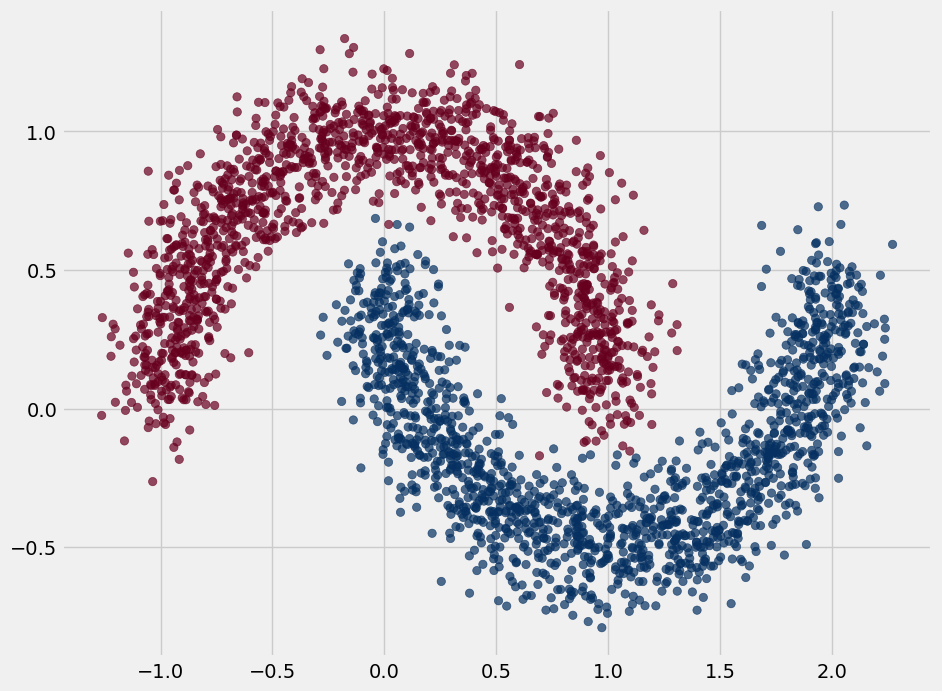

In [8]:
#Visualize data

plt.style.use("fivethirtyeight")
plt.figure(figsize = (10, 8))

plt.scatter(X[:, 0], X[:, 1], c= y, alpha = 0.7, cmap = "RdBu");

0 is red, 1 is blue

Before we make our keras model, how well would the following models work with this data: Logistic Regression, Decision Trees, and K-Nearest Neighbors?

Take 10min a build a model to classify the above data.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=23)

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
logreg.score(X_test, y_test)

0.8893333333333333

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.score(X_test,y_test)

0.996

### Time to design the model.

Setting up a Keras model takes more work than your a Sklearn model.

In [14]:
#Intialization with Sequential

model = Sequential()

Adding an input layer to our model using the Dense function

In [15]:
#Specify number of features in data
n_cols = X.shape[1]

#Adding layer with 10 units, activation function set to relu

model.add(Dense(10, activation="relu", input_shape=(n_cols,)))

Add an output layer, the number of units must be equal to number of unique values in target variable, which in this case is 2. Use the sigmoid activation function

In [16]:
# Add the output layer
#Assign number of uniques to n_unique (here we know it to be 2, either red or blue)
n_unique = len(pd.unique(y))
model.add(Dense(n_unique, activation= "sigmoid"))


Here we compile the model, which means setting the operational parameters for type of optimization, loss function, and metrics (e.g. accuracy, MSE, etc.). It's even possible to use multiple metrics for multi-output models.

In [17]:
#Set optimzer to Stochastic Gradient Descent, loss to categorical_crossentropy, metrics = accuracy
model.compile(optimizer="sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

Before fitting, we have to binarize the target variable making it explicitly categorical in the same sense as ```get_dummies()``` in Pandas.

In [18]:
y_binary = to_categorical(y)
y_binary

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [19]:
#Null accuracy
pd.value_counts(y, normalize=True)

0    0.5
1    0.5
dtype: float64

Fitting time! Call .fit() like you would a sklearn model.

In [20]:
# fit the model
model.fit(X, y_binary, epochs=60)

Epoch 1/60
94/94 [==============================] - 1s 1ms/step - loss: 0.7023 - accuracy: 0.5280
Epoch 2/60
94/94 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.8633
Epoch 3/60
94/94 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8587
Epoch 4/60
94/94 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8523
Epoch 5/60
94/94 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8530
Epoch 6/60
94/94 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8547
Epoch 7/60
94/94 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8567
Epoch 8/60
94/94 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8620
Epoch 9/60
94/94 [==============================] - 0s 1ms/step - loss: 0.2964 - accuracy: 0.8650
Epoch 10/60
94/94 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.8670
Epoch 11/60
94/94 [

In [21]:
# NN Model accuracy on training data
print (np.mean(np.argmax(model.predict(X_train),axis=1)==y_train))

# NN Model accuracy on test data
print(np.mean(np.argmax(model.predict(X_test),axis=1)==y_test))

71/71 [==============================] - 0s 1ms/step
0.8844444444444445
24/24 [==============================] - 0s 1ms/step
0.896


In [22]:
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(np.argmax(model.predict(X_train),axis=1),y_train)
print (accuracy.result().numpy())

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(np.argmax(model.predict(X_test),axis=1),y_test)
print (accuracy.result().numpy())

71/71 [==============================] - 0s 1ms/step
0.8844444
24/24 [==============================] - 0s 966us/step
0.896


Here you can see the simple neural network model is about 90% accurate.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


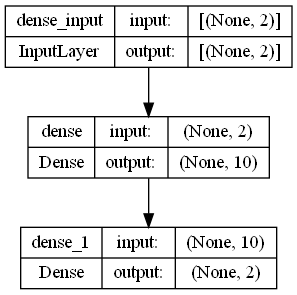

In [25]:
#from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### **CONGRATS ON MAKING YOUR FIRST DEEP LEARNING MODEL**

That's it. You've built a deep learning model. Technically, it's not deep, because it only has 1 layer (excluding the output layer). Deep usually means 2 or more hidden layers.

[Epoch defintion](https://deeplearning4j.org/glossary): "In machine-learning parlance, an epoch is a complete pass through a given dataset. That is, by the end of one epoch, your neural network will have been exposed to every record to example within the dataset once"

<br>

Epochs are another parameter that you have to configure and can have an effect on your model's performance.

The output of the fit() method tells us the log loss and accuracy scores for each epoch. Do you notice any trends in these scores for each epoch?

**Visualization time.** Like we did for previous, we're going to visualize the decision boundaries of this one layer neural net model. 

In [31]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40,cmap="RdBu", alpha=0.4)
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

313/313 [==============================] - 0s 921us/step


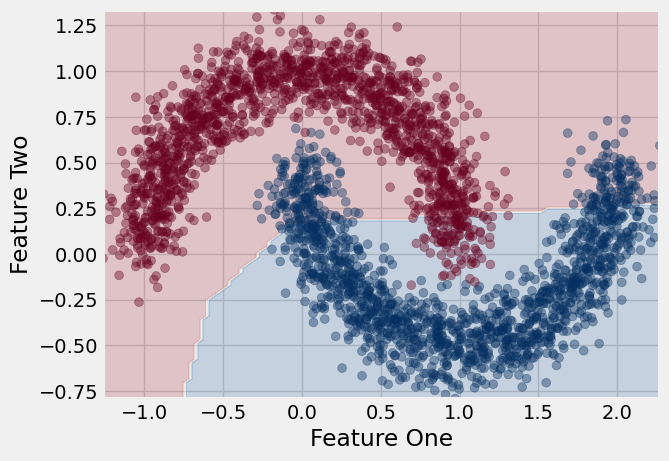

In [32]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

Thoughts on the results? How good is the model?

Make prediction on point (0,0). Works same way as sklearn.

In [33]:
point = np.array([[0, 0]])

model.predict(point)

1/1 [==============================] - 0s 74ms/step


array([[0.22642133, 0.59780604]], dtype=float32)

Instead of outputting a 0 or 1, it gives the probabilites of the of both unique values. This is analogous to the output of Logistic Regression which gives probability of being in one class or the other.

<br>

`.predict_class()` is predicting the class not probability but depracated in latest versions

In [34]:
np.argmax(model.predict(X_test), axis=-1)

24/24 [==============================] - 0s 989us/step


array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

**This was a very simple model, it only has one shallow layer. Now let's add some more layers.**

In [35]:
#Intialize
model = Sequential()

# Add the first layer - 100 nodes
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer - 200 nodes
model.add(Dense(200, activation='relu'))

# Add the output layer with softmax activation function - 2 Nodes
model.add(Dense(2, activation="softmax"))

#Use adam optimizer
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

### Fully-connected layers
The model above is known as a "fully-connected" model That simply means that each node in a layer is connected to every node in the layer before and after.

In [36]:
#Fit model with 30 epochs
model.fit(X, y_binary, epochs=30)

Epoch 1/30
94/94 [==============================] - 1s 1ms/step - loss: 0.3143 - accuracy: 0.8613
Epoch 2/30
94/94 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9173
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9580
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 5/30
94/94 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9933
Epoch 6/30
94/94 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9977
Epoch 7/30
94/94 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9970
Epoch 8/30
94/94 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9977
Epoch 9/30
94/94 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 10/30
94/94 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 11/30
94/94 [

How does the model perform now?

It achieves about 93.93%.

Let's *see* the difference

313/313 [==============================] - 0s 1ms/step


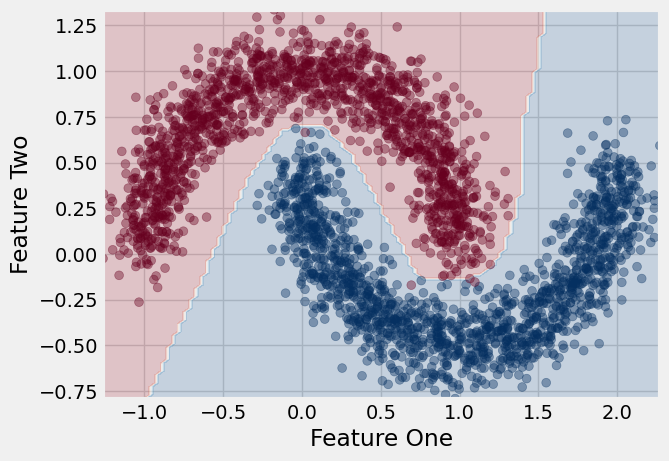

In [37]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

In [38]:
point = np.array([[0, 0]])

model.predict(point)

1/1 [==============================] - 0s 75ms/step


array([[3.6887304e-08, 1.0000000e+00]], dtype=float32)

How does that look to you? Better or worse than before? By how much?

In [39]:
#Look at model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 2)                 402       
                                                                 
Total params: 20,902
Trainable params: 20,902
Non-trainable params: 0
_________________________________________________________________


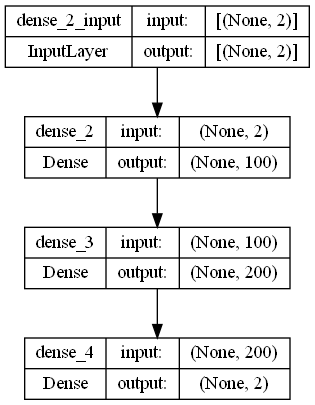

In [40]:
plot_model(model, to_file='model_plot_2.png', show_shapes=True, show_layer_names=True)

We're trained a really good model, but principles of cross validation also apply to deep learning. Here's how we'll evaluate the model on a testing data.

In [41]:
#The same code for fitting a model as we used before but this time set validation_split to 0.25

#Intialize
model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(200, activation='relu'))


# Add the output layer with softmax activation function
model.add(Dense(2, activation="sigmoid"))

#Use adam optimizer
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.fit(X, y_binary, epochs=40, validation_split = 0.25)

Epoch 1/40
71/71 [==============================] - 1s 6ms/step - loss: 0.3507 - accuracy: 0.8493 - val_loss: 0.2252 - val_accuracy: 0.8853
Epoch 2/40
71/71 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.8960 - val_loss: 0.1521 - val_accuracy: 0.9360
Epoch 3/40
71/71 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9467 - val_loss: 0.0793 - val_accuracy: 0.9773
Epoch 4/40
71/71 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9764 - val_loss: 0.0406 - val_accuracy: 0.9947
Epoch 5/40
71/71 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.0251 - val_accuracy: 0.9933
Epoch 6/40
71/71 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9960 - val_loss: 0.0162 - val_accuracy: 0.9960
Epoch 7/40
71/71 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9982 - val_loss: 0.0114 - val_accuracy: 0.9973
Epoch 8/40
71/71 [==

313/313 [==============================] - 0s 1ms/step


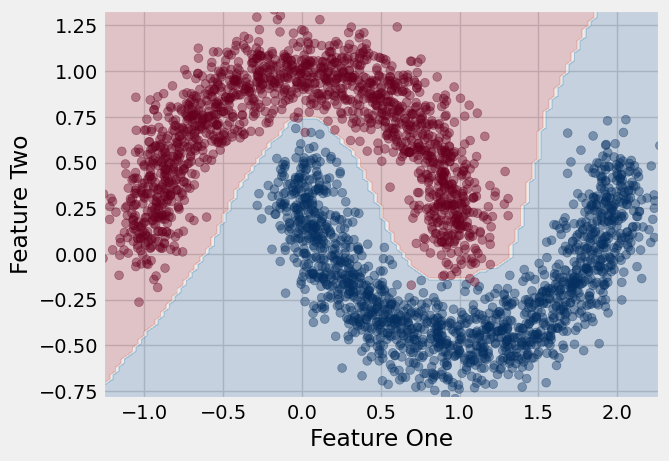

In [42]:
plot_decision_boundary(model, X, y)

Whats your assessment of the model now? Does it overfit?

Now we're getting about 99.87% on the validation score and the training score. So this isn't likely overfitting.

## Regression Deep Learning

Now let's train a neural net on a regression dataset

In [43]:
#Make regression data
Xr, yr = make_regression(n_samples=2000, n_features=1, noise=2, random_state=4,bias = 0.9)
print (f'Shape of Xr={Xr.shape}, yr={yr.shape}')

Shape of Xr=(2000, 1), yr=(2000,)


In [44]:
yr **=2

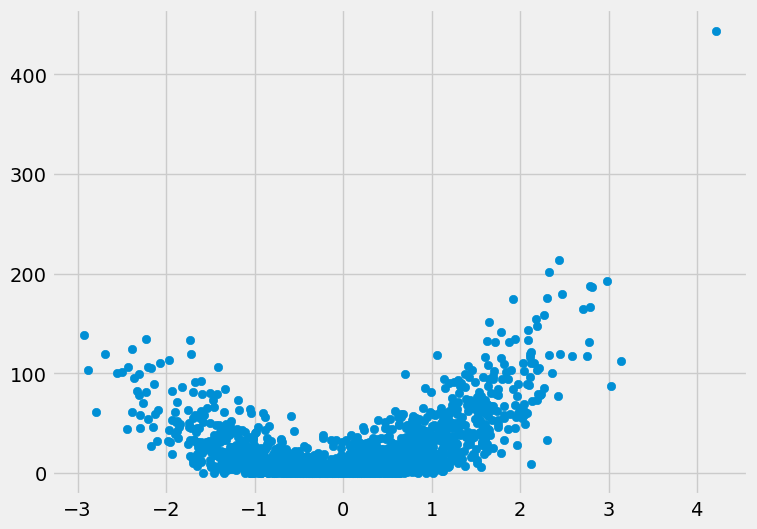

In [45]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr);

In [46]:
n_cols = Xr.shape[1]

#Intialize
model = Sequential()

# Add the first and only layer with 20 units and relu activation function
model.add(Dense(20, activation='relu', input_shape=(n_cols,)))


# Add the output layer with one unit. In regression, the output layer only has one unit.
model.add(Dense(1))


Compiler

In [47]:
#Use adam as optimizer function and set lose to mean_squared_error
model.compile(optimizer="adam", loss = "mean_squared_error")

In [48]:
#Fit model with 20 epochs
model.fit(Xr, yr, epochs = 20)

Epoch 1/20
63/63 [==============================] - 1s 1ms/step - loss: 1363.8121
Epoch 2/20
63/63 [==============================] - 0s 1ms/step - loss: 1339.5861
Epoch 3/20
63/63 [==============================] - 0s 1ms/step - loss: 1315.8524
Epoch 4/20
63/63 [==============================] - 0s 1ms/step - loss: 1288.9530
Epoch 5/20
63/63 [==============================] - 0s 1ms/step - loss: 1256.4904
Epoch 6/20
63/63 [==============================] - 0s 1ms/step - loss: 1218.3961
Epoch 7/20
63/63 [==============================] - 0s 1ms/step - loss: 1175.3085
Epoch 8/20
63/63 [==============================] - 0s 1ms/step - loss: 1128.6980
Epoch 9/20
63/63 [==============================] - 0s 1ms/step - loss: 1079.7802
Epoch 10/20
63/63 [==============================] - 0s 1ms/step - loss: 1030.2043
Epoch 11/20
63/63 [==============================] - 0s 1ms/step - loss: 980.9595
Epoch 12/20
63/63 [==============================] - 0s 1ms/step - loss: 932.4460
Epoch 13/20
63/

Let's try it again but with train test split

In [49]:
model.fit(Xr, yr, epochs = 20, validation_split=.25)

Epoch 1/20
47/47 [==============================] - 0s 6ms/step - loss: 591.7136 - val_loss: 877.1578
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 580.8287 - val_loss: 864.6140
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 570.9384 - val_loss: 852.2760
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 561.3469 - val_loss: 840.5275
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 552.1602 - val_loss: 829.6298
Epoch 6/20
47/47 [==============================] - 0s 2ms/step - loss: 543.6135 - val_loss: 818.4672
Epoch 7/20
47/47 [==============================] - 0s 2ms/step - loss: 534.9598 - val_loss: 808.2587
Epoch 8/20
47/47 [==============================] - 0s 2ms/step - loss: 526.6899 - val_loss: 798.6650
Epoch 9/20
47/47 [==============================] - 0s 2ms/step - loss: 518.6943 - val_loss: 788.1979
Epoch 10/20
47/47 [==============================] - 0s 2ms/step - loss: 510.8897 

Visualize predictions

In [50]:
#Predictions

preds = model.predict(Xr)
preds

63/63 [==============================] - 0s 1ms/step


array([[49.140053],
       [15.099421],
       [23.455   ],
       ...,
       [14.029971],
       [16.231817],
       [21.516123]], dtype=float32)

In [51]:
#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()

pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

In [52]:
#Sort dataframe

pred_df.sort_values("feature", inplace=True)

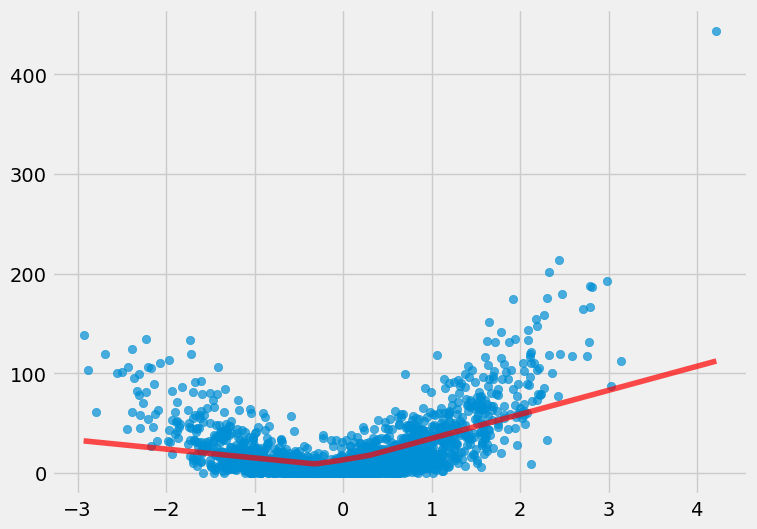

In [53]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr, alpha=.7)
plt.plot(pred_df.feature, pred_df.preds,c = "r",  alpha = 0.7);

How does that look?

**Back to the drawing board!**

We need more layers!!

In [54]:
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [55]:
#Fit model with 40 epochs
model.fit(Xr, yr, epochs = 40, validation_split=.25)

Epoch 1/40
47/47 [==============================] - 1s 6ms/step - loss: 1210.0823 - val_loss: 1488.4308
Epoch 2/40
47/47 [==============================] - 0s 2ms/step - loss: 935.2680 - val_loss: 1040.4396
Epoch 3/40
47/47 [==============================] - 0s 2ms/step - loss: 560.1749 - val_loss: 727.7283
Epoch 4/40
47/47 [==============================] - 0s 2ms/step - loss: 418.6871 - val_loss: 637.1698
Epoch 5/40
47/47 [==============================] - 0s 2ms/step - loss: 373.7144 - val_loss: 588.1872
Epoch 6/40
47/47 [==============================] - 0s 2ms/step - loss: 350.4058 - val_loss: 560.5146
Epoch 7/40
47/47 [==============================] - 0s 2ms/step - loss: 334.9841 - val_loss: 540.7513
Epoch 8/40
47/47 [==============================] - 0s 2ms/step - loss: 324.3517 - val_loss: 520.6884
Epoch 9/40
47/47 [==============================] - 0s 2ms/step - loss: 317.8452 - val_loss: 509.5088
Epoch 10/40
47/47 [==============================] - 0s 2ms/step - loss: 310.94

In [56]:
#Predictions

preds = model.predict(Xr)
preds

#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()

pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

#Sort dataframe

pred_df.sort_values("feature", inplace=True)

63/63 [==============================] - 0s 1ms/step


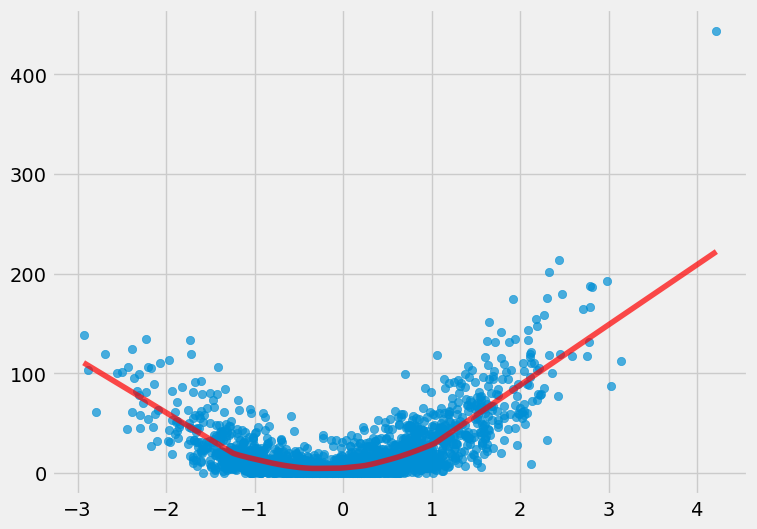

In [57]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr, alpha=.7)
plt.plot(pred_df.feature, pred_df.preds,c = "r",  alpha = 0.7);

How does that look?

In [58]:
#Prediction
p = np.array([[0]])
model.predict(p)

1/1 [==============================] - 0s 74ms/step


array([[5.142945]], dtype=float32)

In [59]:
#Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


Let's visualize the performance over the epochs, but first we have to reset the model.

In [60]:
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [61]:
#Re fit the model but set verbose to False and use 40 epochs and validation split to .3
#Assign model to m variable
m = model.fit(Xr, yr, epochs=40, validation_split=0.2, verbose=False)

In [62]:
#Call .history on m
m.history

{'loss': [1218.38525390625,
  914.8045043945312,
  546.0059814453125,
  420.8370056152344,
  378.3599548339844,
  357.4491882324219,
  341.0978088378906,
  330.5657958984375,
  321.76153564453125,
  315.3559875488281,
  310.7474365234375,
  307.7825927734375,
  305.3306884765625,
  299.81549072265625,
  295.8263244628906,
  293.6924743652344,
  290.9688415527344,
  289.05096435546875,
  286.443603515625,
  284.8180236816406,
  283.4561767578125,
  283.080322265625,
  280.0763244628906,
  280.1261901855469,
  279.6489562988281,
  277.953369140625,
  276.9408264160156,
  276.4281311035156,
  277.1248779296875,
  277.61932373046875,
  275.7806701660156,
  276.5058288574219,
  275.5588684082031,
  277.2178039550781,
  273.8711853027344,
  275.42938232421875,
  273.7502746582031,
  274.1255187988281,
  273.2646484375,
  273.90802001953125],
 'val_loss': [1534.582763671875,
  1063.142333984375,
  760.5623168945312,
  660.9513549804688,
  622.2777099609375,
  589.7986450195312,
  566.69665527

We're going to plot the scores over the course of the epochs

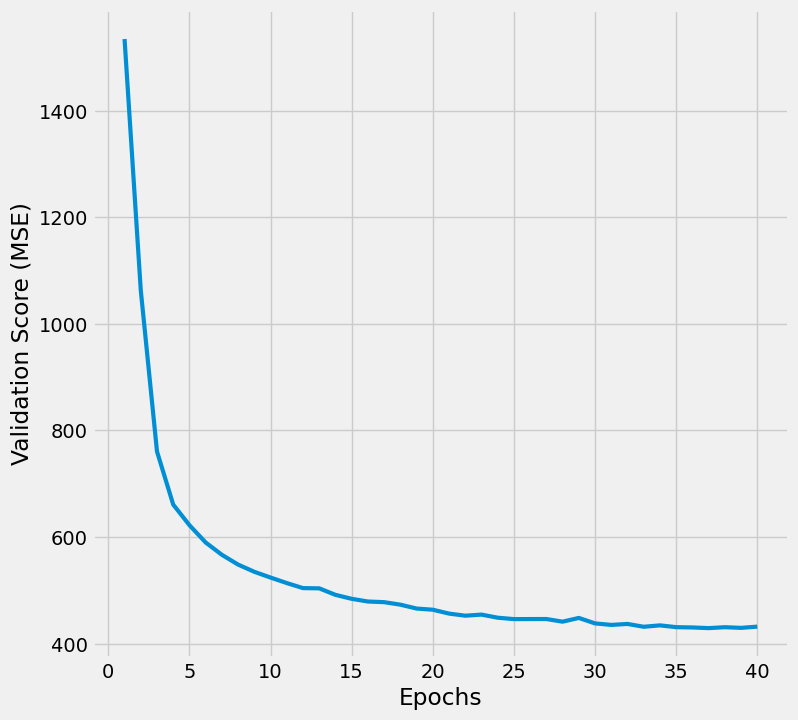

In [63]:
plt.figure(figsize=(8, 8))
epochs = range(1, 41)
plt.plot(epochs, m.history["val_loss"], linewidth =3)
plt.xlabel("Epochs")
plt.ylabel("Validation Score (MSE)");

What relationship do you see here? What does this tell us about our epochs?

We're going to use early stopping to save us time

In [64]:
#Intialize early_stopper object with patience = 1 and min_delta = 1

es = EarlyStopping(patience=1, min_delta=1)

Patience value indicates how many epochs of no improvement until the algorithms stops fitting.

Min_delta value is the model improvement threshold it must meet in order to keep going.

Restart the model from the beginning.

In [65]:
model = Sequential()

# Add the first layer with 100 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 100 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [66]:
#Fit model on regresion data, use 40 epochs, validation split of .2
#Set callbacks equal to [es]
model.fit(Xr, yr, epochs=40, validation_split=0.2, callbacks=[es])

Epoch 1/40
50/50 [==============================] - 1s 5ms/step - loss: 1204.3807 - val_loss: 1504.1033
Epoch 2/40
50/50 [==============================] - 0s 2ms/step - loss: 883.3254 - val_loss: 1025.4480
Epoch 3/40
50/50 [==============================] - 0s 2ms/step - loss: 524.3055 - val_loss: 732.6152
Epoch 4/40
50/50 [==============================] - 0s 2ms/step - loss: 410.9231 - val_loss: 654.9063
Epoch 5/40
50/50 [==============================] - 0s 2ms/step - loss: 375.0243 - val_loss: 614.5151
Epoch 6/40
50/50 [==============================] - 0s 2ms/step - loss: 353.0711 - val_loss: 585.0583
Epoch 7/40
50/50 [==============================] - 0s 2ms/step - loss: 339.4423 - val_loss: 564.9180
Epoch 8/40
50/50 [==============================] - 0s 2ms/step - loss: 328.6577 - val_loss: 547.6240
Epoch 9/40
50/50 [==============================] - 0s 2ms/step - loss: 320.5936 - val_loss: 532.3325
Epoch 10/40
50/50 [==============================] - 0s 2ms/step - loss: 314.58

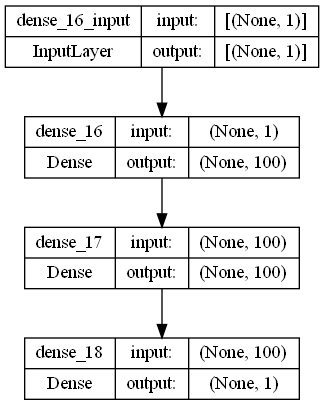

In [67]:
plot_model(model, to_file='model_plot_5.png', show_shapes=True, show_layer_names=True)

## Bonus

http://playground.tensorflow.org/

# Resources

https://github.com/GeorgeMcIntire/collection_free_DL_resources

Articles:

- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

- https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

- http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/

- https://sefiks.com/2017/11/08/softmax-as-a-neural-networks-activation-function/

- https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/


# Class Lab Time

1. Make a function that returns a pre-initialized with a two layer Keras model. The choice of parameters are up to you.

2. Pick a supervised learning dataset (regression or classification) and use Keras to model that data. Compare results of the keras model to that of a logistic regression model. You're also more than welcome to use keras on your final project data as well.
